In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import os
import pickle
import collections
import copy
sns.set()

In [2]:
import matplotlib.style as style
style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [3]:
style.use('seaborn-deep')

In [4]:
paths = ['/Users/dgagler/School/SecondaryProject/RedoxEnzymes/rxn_lists/biosphere_KEGG',
        '/Users/dgagler/School/SecondaryProject/RedoxEnzymes/rxn_lists/ecosystem_JGI',
        '/Users/dgagler/School/SecondaryProject/RedoxEnzymes/rxn_lists/individual_archaea_parsed',
        '/Users/dgagler/School/SecondaryProject/RedoxEnzymes/rxn_lists/individual_bacteria_parsed',
        '/Users/dgagler/School/SecondaryProject/RedoxEnzymes/rxn_lists/individual_eukarya']

files = {}

for path in paths: ### joining data
    files[path] = glob.glob(os.path.join(path, '*.dat'))
    
biosphere_rxn_dats = files[paths[0]]
ecosystem_rxn_dats = files[paths[1]]
archaea_rxn_dats = files[paths[2]]
bacteria_rxn_dats = files[paths[3]]
eukarya_rxn_dats = files[paths[4]]

biosphere_rxn_dats.sort()
biosphere_rxn_dats.sort(key=len) ### sorts list

ecosystem_rxn_dats.sort()
ecosystem_rxn_dats.sort(key=len)

archaea_rxn_dats.sort()
archaea_rxn_dats.sort(key=len)

bacteria_rxn_dats.sort()
bacteria_rxn_dats.sort(key=len)

eukarya_rxn_dats.sort()
eukarya_rxn_dats.sort(key=len)

In [5]:
##############################################################################
######################## FILE READING FUNCTION ###############################
### reads files and sorts lines into species IDs and an ec list dictionary ###
##############################################################################

def pull_ecrxndata(dats):
    ecrxn_list = []
    species_id_list = []
    for i in dats:
        f = open(i, 'r')
        lines = f.read().splitlines()
        a = lines[0]
        a = a.split()
        ecrxn = lines[1:]
        ecrxn_list.append(ecrxn)
        species_id = a[1]
        species_id_list.append(species_id)
    return(ecrxn_list, species_id_list)

In [6]:
biosphere_rxns, biosphere_ids = pull_ecrxndata(biosphere_rxn_dats)
ecosystem_rxns, ecosystem_ids = pull_ecrxndata(ecosystem_rxn_dats)
archaea_rxns, archaea_ids = pull_ecrxndata(archaea_rxn_dats)
bacteria_rxns, archaea_ids = pull_ecrxndata(bacteria_rxn_dats)
eukarya_rxns, eukarya_ids = pull_ecrxndata(eukarya_rxn_dats)

In [7]:
def meta_list(list_of_ecs):
    extended = []
    for i in list_of_ecs:
        extended.extend(i)
    counter = collections.Counter(extended)
    aba = len(counter)
    return aba, counter

In [8]:
bio_metarxns, bio_counter = meta_list(biosphere_rxns)
bact_metarxns, bact_counter = meta_list(bacteria_rxns)
arch_metarxns, arch_counter = meta_list(archaea_rxns)
euk_metarxns, euk_counter = meta_list(eukarya_rxns)
eco_metarxns, eco_counter = meta_list(ecosystem_rxns)

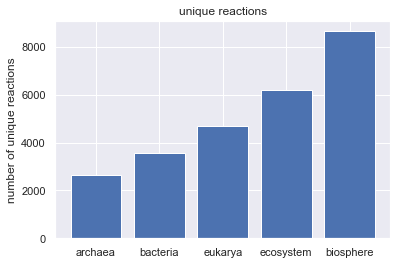

In [9]:
meta_rxns = [bio_metarxns, bact_metarxns, arch_metarxns, euk_metarxns, eco_metarxns]
plt.bar(np.arange(5), [arch_metarxns, bact_metarxns, euk_metarxns, eco_metarxns, bio_metarxns])
plt.xticks(np.arange(5), ['archaea', 'bacteria', 'eukarya', 'ecosystem', 'biosphere'])
plt.ylabel('number of unique reactions')
plt.title('unique reactions')
plt.savefig('unique_rxns_in_domain')

In [10]:
def frac_dict(list_of_ecs):
    extended = []
    for i in list_of_ecs:
        extended.extend(i)
    #return(extended)
    counter = collections.Counter(extended)
    frac_dict = {}
    for i in counter:
        frac = counter[i] / len(list_of_ecs)
        frac_dict[i] = frac
    return(frac_dict)

In [11]:
bio_frac_dict = frac_dict(biosphere_rxns)
eco_frac_dict = frac_dict(ecosystem_rxns)
arch_frac_dict = frac_dict(archaea_rxns)
bact_frac_dict = frac_dict(bacteria_rxns)
euk_frac_dict = frac_dict(eukarya_rxns)

In [12]:
arch_rxnfracs = np.fromiter(arch_frac_dict.values(), dtype=float)
bact_rxnfracs = np.fromiter(bact_frac_dict.values(), dtype=float)
euk_rxnfracs = np.fromiter(euk_frac_dict.values(), dtype=float)
eco_rxnfracs = np.fromiter(eco_frac_dict.values(), dtype=float)
bio_rxnfracs = np.fromiter(bio_frac_dict.values(), dtype=float)

In [13]:
arch_rxnweights = np.ones_like(arch_rxnfracs)/float(len(arch_rxnfracs))
bact_rxnweights = np.ones_like(bact_rxnfracs)/float(len(bact_rxnfracs))
euk_rxnweights = np.ones_like(euk_rxnfracs)/float(len(euk_rxnfracs))
eco_rxnweights = np.ones_like(eco_rxnfracs)/float(len(eco_rxnfracs))
bio_rxnweights = np.ones_like(bio_rxnfracs)/float(len(bio_rxnfracs))

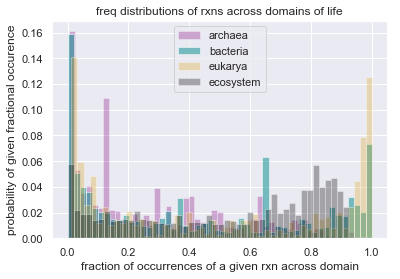

In [14]:
plt.hist(arch_rxnfracs, bins=50, weights=arch_rxnweights, color='purple', alpha=0.3, label='archaea')
plt.hist(bact_rxnfracs, bins=50, weights=bact_rxnweights, color='darkcyan', alpha=0.5, label='bacteria')
plt.hist(euk_rxnfracs, bins=50, weights=euk_rxnweights, color='goldenrod', alpha=0.3, label='eukarya')
plt.hist(eco_rxnfracs, bins=50, weights=eco_rxnweights, color='black', alpha=0.3, label='ecosystem')
plt.xlabel('fraction of occurrences of a given rxn across domain')
plt.ylabel('probability of given fractional occurence')
plt.title('freq distributions of rxns across domains of life')
plt.legend(loc='best')
plt.savefig('alldomains_freqdist_normed')
plt.show()


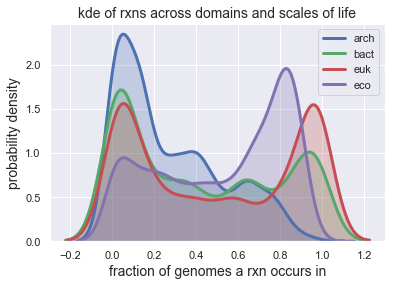

In [203]:
sns.distplot(arch_rxnfracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='arch')
sns.distplot(bact_rxnfracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='bact')
sns.distplot(euk_rxnfracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='euk')
sns.distplot(eco_rxnfracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='eco')
plt.xlabel('fraction of genomes a rxn occurs in', fontsize=14)
plt.ylabel('probability density', fontsize=14)
plt.title('kde of rxns across domains and scales of life', fontsize=14)
plt.savefig('rxn_kde')
plt.show()

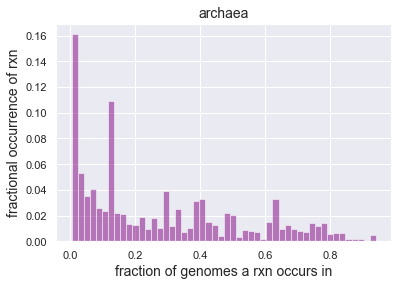

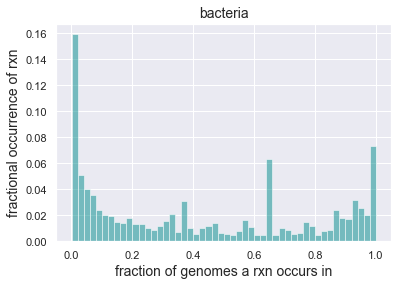

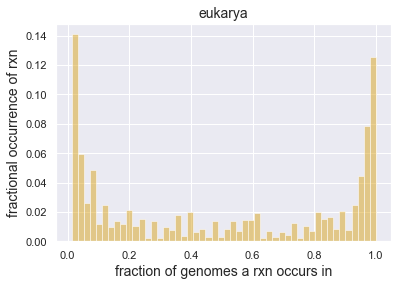

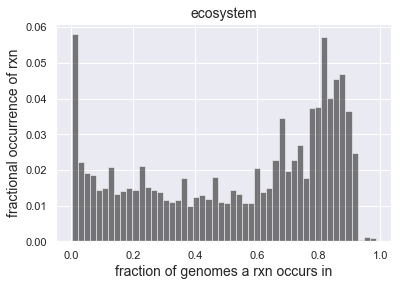

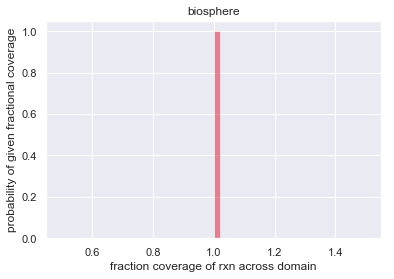

In [40]:
plt.hist(arch_rxnfracs, bins=50, weights=arch_rxnweights, color='purple', alpha=0.5, label='archaea')
plt.xlabel('fraction of genomes a rxn occurs in', fontsize=14)
plt.ylabel('fractional occurrence of rxn', fontsize=14)
plt.title('archaea', fontsize=14)
plt.savefig('arch_rxn_freq_normed')
plt.show()

plt.hist(bact_rxnfracs, bins=50, weights=bact_rxnweights, color='darkcyan', alpha=0.5, label='archaea')
plt.xlabel('fraction of genomes a rxn occurs in', fontsize=14)
plt.ylabel('fractional occurrence of rxn', fontsize=14)
plt.title('bacteria', fontsize=14)
plt.savefig('bact_rxn_freq_normed')
plt.show()

plt.hist(euk_rxnfracs, bins=50, weights=euk_rxnweights, color='goldenrod', alpha=0.5, label='archaea')
plt.xlabel('fraction of genomes a rxn occurs in', fontsize=14)
plt.ylabel('fractional occurrence of rxn', fontsize=14)
plt.title('eukarya', fontsize=14)
plt.savefig('euk_rxn_freq_normed')
plt.show()

plt.hist(eco_rxnfracs, bins=50, weights=eco_rxnweights, color='black', alpha=0.5, label='archaea')
plt.xlabel('fraction of genomes a rxn occurs in', fontsize=14)
plt.ylabel('fractional occurrence of rxn', fontsize=14)
plt.title('ecosystem', fontsize=14)
plt.savefig('eco_rxn_freq_normed')
plt.show()

plt.hist(bio_rxnfracs, bins=50, weights=bio_rxnweights, color='crimson', alpha=0.5, label='archaea')
plt.xlabel('fraction coverage of rxn across domain')
plt.ylabel('probability of given fractional coverage')
plt.title('biosphere')
plt.savefig('bio_rxn_freq_normed')
plt.show()

In [17]:
ecosystem_df = pd.read_pickle('ecosystem_ecs.pkl')
archaea_df = pd.read_pickle('archaea_ecs.pkl')
bacteria_df = pd.read_pickle('bacteria_ecs.pkl')
eukarya_df = pd.read_pickle('eukarya_ecs.pkl')

In [18]:
eukarya_df['ecs'].head()

1352    [1.1.1.-, 1.1.1.1, 1.1.1.10, 1.1.1.100, 1.1.1....
1353    [1.1.1.-, 1.1.1.1, 1.1.1.10, 1.1.1.100, 1.1.1....
1354    [1.1.1.-, 1.1.1.1, 1.1.1.10, 1.1.1.102, 1.1.1....
1355    [1.1.1.-, 1.1.1.1, 1.1.1.10, 1.1.1.100, 1.1.1....
1356    [1.1.1.-, 1.1.1.1, 1.1.1.100, 1.1.1.102, 1.1.1...
Name: ecs, dtype: object

In [19]:
frames = [ecosystem_df, archaea_df, bacteria_df, eukarya_df]
df = pd.concat(frames, sort=False)

In [20]:
def ec_delineation(df):
    df.head()
    df['ecs']
    ec1s = []
    ec2s = []
    ec3s = []
    ec4s = []
    ec5s = []
    ec6s = []
    
    for i in df['ecs']:
        for j in i:
            if j[0] == '1':
                ec1s.append(j)
            if j[0] == '2':
                ec2s.append(j)
            if j[0] == '3':
                ec3s.append(j)
            if j[0] == '4':
                ec4s.append(j)
            if j[0] == '5':
                ec5s.append(j)
            if j[0] == '6':
                ec6s.append(j)
            
    return ec1s, ec2s, ec3s, ec4s, ec5s, ec6s

In [21]:
ec1s, ec2s, ec3s, ec4s, ec5s, ec6s = ec_delineation(df)

In [22]:
#####################################################################################################################
### takes a meta ec list and the possible occurrences (defined as length of total ec list for domain of interest) ###
###                                                                                                               ###
### meta ec list = extended list of all individual ec counts in a domain...this allows for multiples ###############
###                                                                                                               ###
### counter determines counts for each unique ec in the meta ec list ################################################
###                                                                                                              ###
### then a fractional occurrence for each unique ec is determined by dividing the raw occurrence count by the #######
### number of possible occurrences ##################################################################################
#####################################################################################################################

def ec_fracs(ec_list):
    counter = collections.Counter(ec_list)
    frac_dict = {}
    for i in counter:
        frac = counter[i] / len(ec_list) ### length of total ec list aka possible occurrences
        frac_dict[i] = frac
    return(frac_dict)

In [23]:
def ec_counter(ec_list):
    counter = collections.Counter(ec_list)
    return counter

In [24]:
def full_ec_counts(ec_list):
    extended = []
    for i in ec_list:
        extended.extend(i)
    counter = collections.Counter(extended)
    abab = np.fromiter(counter.values(), dtype=float)
    return len(abab)

In [25]:
### gets avg EC count for each domain

def avg_ec(ec_list):
    running_total = []
    for i in ec_list:
        count = len(i)
        running_total.append(count)
        avg = int(sum(running_total) / len(ec_list))
    return avg
        

In [26]:
### get full length lists of unique ECs
arch_ecs = full_ec_counts(archaea_df['ecs'])
bact_ecs = full_ec_counts(bacteria_df['ecs'])
euk_ecs = full_ec_counts(eukarya_df['ecs'])
eco_ecs = full_ec_counts(ecosystem_df['ecs'])
bio_ecs = full_ec_counts(df['ecs'])

In [27]:
arch_avg = avg_ec(archaea_df['ecs'])
bact_avg = avg_ec(bacteria_df['ecs'])
euk_avg = avg_ec(eukarya_df['ecs'])
eco_avg = avg_ec(ecosystem_df['ecs'])

print(arch_avg)
print(bact_avg)
print(euk_avg)
print(eco_avg)

240
487
866
1438


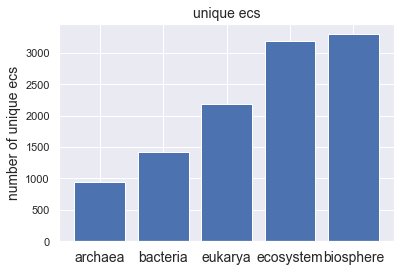

In [41]:
plt.bar(np.arange(5), [arch_ecs, bact_ecs, euk_ecs, eco_ecs, bio_ecs])
plt.xticks(np.arange(5), ('archaea', 'bacteria', 'eukarya', 'ecosystem', 'biosphere'), fontsize=14)
plt.ylabel('number of unique ecs', fontsize=14)
plt.title('unique ecs', fontsize=14)
plt.savefig('unique_ecs_in_domain')

In [29]:
### EC DELINEATIONS

arch_ec1, arch_ec2, arch_ec3, arch_ec4, arch_ec5, arch_ec6 = ec_delineation(archaea_df) 
bact_ec1, bact_ec2, bact_ec3, bact_ec4, bact_ec5, bact_ec6 = ec_delineation(bacteria_df) 
euk_ec1, euk_ec2, euk_ec3, euk_ec4, euk_ec5, euk_ec6 = ec_delineation(eukarya_df) 
eco_ec1, eco_ec2, eco_ec3, eco_ec4, eco_ec5, eco_ec6 = ec_delineation(ecosystem_df) 

In [115]:
def domain_ec_counts(domain_ecs):
    ec1, ec2, ec3, ec4, ec5, ec6, ectotal = ([] for i in range(7))
    
    for i in domain_ecs:
        ec_length = 0
        sub_ec1, sub_ec2, sub_ec3, sub_ec4, sub_ec5, sub_ec6 = (0 for i in range(6))
        for j in i:
            ec_length += 1
            if j[0] == '1':
                sub_ec1 += 1
            if j[0] == '2':
                sub_ec2 += 1
            if j[0] == '3':
                sub_ec3 += 1
            if j[0] == '4':
                sub_ec4 += 1
            if j[0] == '5':
                sub_ec5 += 1
            if j[0] == '6':
                sub_ec6 += 1
        ec1.append(sub_ec1)
        ec2.append(sub_ec2)
        ec3.append(sub_ec3)
        ec4.append(sub_ec4)
        ec5.append(sub_ec5)
        ec6.append(sub_ec6)
        ectotal.append(ec_length)

    
    return (ec1, ec2, ec3, ec4, ec5, ec6, ectotal)

In [116]:
archec1, archec2, archec3, archec4, archec5, archec6, archec_total = domain_ec_counts(archaea_df['ecs'])
bactec1, bactec2, bactec3, bactec4, bactec5, bactec6, bactec_total = domain_ec_counts(bacteria_df['ecs'])
eukec1, eukec2, eukec3, eukec4, eukec5, eukec6, eukec_total = domain_ec_counts(eukarya_df['ecs'])
ecoec1, ecoec2, ecoec3, ecoec4, ecoec5, ecoec6, ecoec_total = domain_ec_counts(ecosystem_df['ecs'])

In [169]:
archec1_frac = [archec1[i] / archec_total[i] for i in range(len(archec1))]
archec2_frac = [archec2[i] / archec_total[i] for i in range(len(archec2))]
archec3_frac = [archec3[i] / archec_total[i] for i in range(len(archec3))]
archec4_frac = [archec4[i] / archec_total[i] for i in range(len(archec4))]
archec5_frac = [archec5[i] / archec_total[i] for i in range(len(archec5))]
archec6_frac = [archec6[i] / archec_total[i] for i in range(len(archec6))]

archec1_frac_avg = (np.mean(archec1_frac))
archec2_frac_avg = (np.mean(archec2_frac))
archec3_frac_avg = (np.mean(archec3_frac))
archec4_frac_avg = (np.mean(archec4_frac))
archec5_frac_avg = (np.mean(archec5_frac))
archec6_frac_avg = (np.mean(archec6_frac))

archec1_frac_std = (np.std(archec1_frac))
archec2_frac_std = (np.std(archec2_frac))
archec3_frac_std = (np.std(archec3_frac))
archec4_frac_std = (np.std(archec4_frac))
archec5_frac_std = (np.std(archec5_frac))
archec6_frac_std = (np.std(archec6_frac))

bactec1_frac = [bactec1[i] / bactec_total[i] for i in range(len(bactec1))]
bactec2_frac = [bactec2[i] / bactec_total[i] for i in range(len(bactec2))]
bactec3_frac = [bactec3[i] / bactec_total[i] for i in range(len(bactec3))]
bactec4_frac = [bactec4[i] / bactec_total[i] for i in range(len(bactec4))]
bactec5_frac = [bactec5[i] / bactec_total[i] for i in range(len(bactec5))]
bactec6_frac = [bactec6[i] / bactec_total[i] for i in range(len(bactec6))]

bactec1_frac_avg = (np.mean(bactec1_frac))
bactec2_frac_avg = (np.mean(bactec2_frac))
bactec3_frac_avg = (np.mean(bactec3_frac))
bactec4_frac_avg = (np.mean(bactec4_frac))
bactec5_frac_avg = (np.mean(bactec5_frac))
bactec6_frac_avg = (np.mean(bactec6_frac))

bactec1_frac_std = (np.std(bactec1_frac))
bactec2_frac_std = (np.std(bactec2_frac))
bactec3_frac_std = (np.std(bactec3_frac))
bactec4_frac_std = (np.std(bactec4_frac))
bactec5_frac_std = (np.std(bactec5_frac))
bactec6_frac_std = (np.std(bactec6_frac))

eukec1_frac = [eukec1[i] / eukec_total[i] for i in range(len(eukec1))]
eukec2_frac = [eukec2[i] / eukec_total[i] for i in range(len(eukec2))]
eukec3_frac = [eukec3[i] / eukec_total[i] for i in range(len(eukec3))]
eukec4_frac = [eukec4[i] / eukec_total[i] for i in range(len(eukec4))]
eukec5_frac = [eukec5[i] / eukec_total[i] for i in range(len(eukec5))]
eukec6_frac = [eukec6[i] / eukec_total[i] for i in range(len(eukec6))]

eukec1_frac_avg = (np.mean(eukec1_frac))
eukec2_frac_avg = (np.mean(eukec2_frac))
eukec3_frac_avg = (np.mean(eukec3_frac))
eukec4_frac_avg = (np.mean(eukec4_frac))
eukec5_frac_avg = (np.mean(eukec5_frac))
eukec6_frac_avg = (np.mean(eukec6_frac))

eukec1_frac_std = (np.std(eukec1_frac))
eukec2_frac_std = (np.std(eukec2_frac))
eukec3_frac_std = (np.std(eukec3_frac))
eukec4_frac_std = (np.std(eukec4_frac))
eukec5_frac_std = (np.std(eukec5_frac))
eukec6_frac_std = (np.std(eukec6_frac))

ecoec1_frac = [eco / eco_total if eco_total != 0 else 0 for eco, eco_total in zip(ecoec1, ecoec_total)]
ecoec2_frac = [eco / eco_total if eco_total != 0 else 0 for eco, eco_total in zip(ecoec2, ecoec_total)]
ecoec3_frac = [eco / eco_total if eco_total != 0 else 0 for eco, eco_total in zip(ecoec3, ecoec_total)]
ecoec4_frac = [eco / eco_total if eco_total != 0 else 0 for eco, eco_total in zip(ecoec4, ecoec_total)]
ecoec5_frac = [eco / eco_total if eco_total != 0 else 0 for eco, eco_total in zip(ecoec5, ecoec_total)]
ecoec6_frac = [eco / eco_total if eco_total != 0 else 0 for eco, eco_total in zip(ecoec6, ecoec_total)]

ecoec1_frac_avg = (np.mean(ecoec1_frac))
ecoec2_frac_avg = (np.mean(ecoec2_frac))
ecoec3_frac_avg = (np.mean(ecoec3_frac))
ecoec4_frac_avg = (np.mean(ecoec4_frac))
ecoec5_frac_avg = (np.mean(ecoec5_frac))
ecoec6_frac_avg = (np.mean(ecoec6_frac))

ecoec1_frac_std = (np.std(ecoec1_frac))
ecoec2_frac_std = (np.std(ecoec2_frac))
ecoec3_frac_std = (np.std(ecoec3_frac))
ecoec4_frac_std = (np.std(ecoec4_frac))
ecoec5_frac_std = (np.std(ecoec5_frac))
ecoec6_frac_std = (np.std(ecoec6_frac))

In [78]:
### AVGS ###
archec1_avg = int(np.mean(archec1))
archec2_avg = int(np.mean(archec2))
archec3_avg = int(np.mean(archec3))
archec4_avg = int(np.mean(archec4))
archec5_avg = int(np.mean(archec5))
archec6_avg = int(np.mean(archec6))

bactec1_avg = int(np.mean(bactec1))
bactec2_avg = int(np.mean(bactec2))
bactec3_avg = int(np.mean(bactec3))
bactec4_avg = int(np.mean(bactec4))
bactec5_avg = int(np.mean(bactec5))
bactec6_avg = int(np.mean(bactec6))

eukec1_avg = int(np.mean(eukec1))
eukec2_avg = int(np.mean(eukec2))
eukec3_avg = int(np.mean(eukec3))
eukec4_avg = int(np.mean(eukec4))
eukec5_avg = int(np.mean(eukec5))
eukec6_avg = int(np.mean(eukec6))

ecoec1_avg = int(np.mean(ecoec1))
ecoec2_avg = int(np.mean(ecoec2))
ecoec3_avg = int(np.mean(ecoec3))
ecoec4_avg = int(np.mean(ecoec4))
ecoec5_avg = int(np.mean(ecoec5))
ecoec6_avg = int(np.mean(ecoec6))

In [67]:
### STD DEVS ###

archec1_std = np.std(archec1)
archec2_std = np.std(archec2)
archec3_std = np.std(archec3)
archec4_std = np.std(archec4)
archec5_std = np.std(archec5)
archec6_std = np.std(archec6)

bactec1_std = np.std(bactec1)
bactec2_std = np.std(bactec2)
bactec3_std = np.std(bactec3)
bactec4_std = np.std(bactec4)
bactec5_std = np.std(bactec5)
bactec6_std = np.std(bactec6)

eukec1_std = np.std(eukec1)
eukec2_std = np.std(eukec2)
eukec3_std = np.std(eukec3)
eukec4_std = np.std(eukec4)
eukec5_std = np.std(eukec5)
eukec6_std = np.std(eukec6)

ecoec1_std = np.std(ecoec1)
ecoec2_std = np.std(ecoec2)
ecoec3_std = np.std(ecoec3)
ecoec4_std = np.std(ecoec4)
ecoec5_std = np.std(ecoec5)
ecoec6_std = np.std(ecoec6)


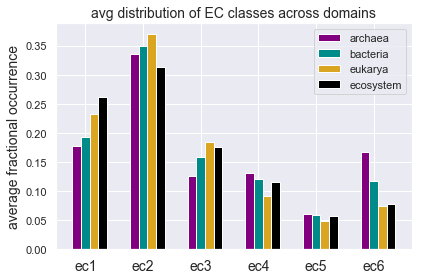

In [193]:
x = np.arange(6)
ax1 = plt.subplot(1,1,1)
w = 0.15

plt.bar(x, [archec1_frac_avg, archec2_frac_avg, archec3_frac_avg,
            archec4_frac_avg, archec5_frac_avg, archec6_frac_avg], width=w, label='archaea', color='purple')
       #yerr = [archec1_std, archec2_std, archec3_std, archec4_std, archec5_std, archec6_std], width=w)
plt.bar(x+w, [bactec1_frac_avg, bactec2_frac_avg, bactec3_frac_avg,
              bactec4_frac_avg, bactec5_frac_avg, bactec6_frac_avg], width=w, label='bacteria', color='darkcyan')
      # yerr = [bactec1_std, bactec2_std, bactec3_std, bactec4_std, bactec5_std, bactec6_std], width=w)
plt.bar(x+2*w, [eukec1_frac_avg, eukec2_frac_avg, eukec3_frac_avg,
                eukec4_frac_avg, eukec5_frac_avg, eukec6_frac_avg], width=w, label='eukarya', color='goldenrod')
      # yerr = [eukec1_std, eukec2_std, eukec3_std, eukec4_std, eukec5_std, eukec6_std], width=w)
plt.bar(x+3*w, [ecoec1_frac_avg, ecoec2_frac_avg, ecoec3_frac_avg,
                ecoec4_frac_avg, ecoec5_frac_avg, ecoec6_frac_avg], width=w, label='ecosystem', color='black')
      # yerr = [ecoec1_std, ecoec2_std, ecoec3_std, ecoec4_std, ecoec5_std, ecoec6_std], width=w)
plt.xticks(x+w, ('ec1', 'ec2', 'ec3', 'ec4', 'ec5', 'ec6'), fontsize=14)
plt.ylabel('average fractional occurrence', fontsize=14)
plt.title('avg distribution of EC classes across domains', fontsize=14)
plt.legend(loc='upper right')
plt.savefig('avgECs_cross_domain')
plt.tight_layout()
plt.show()

In [68]:
arch_ec1_dict = ec_counter(arch_ec1)
arch_ec2_dict = ec_counter(arch_ec2)
arch_ec3_dict = ec_counter(arch_ec3)
arch_ec4_dict = ec_counter(arch_ec4)
arch_ec5_dict = ec_counter(arch_ec5)
arch_ec6_dict = ec_counter(arch_ec6)

bact_ec1_dict = ec_counter(bact_ec1)
bact_ec2_dict = ec_counter(bact_ec2)
bact_ec3_dict = ec_counter(bact_ec3)
bact_ec4_dict = ec_counter(bact_ec4)
bact_ec5_dict = ec_counter(bact_ec5)
bact_ec6_dict = ec_counter(bact_ec6)

euk_ec1_dict = ec_counter(euk_ec1)
euk_ec2_dict = ec_counter(euk_ec2)
euk_ec3_dict = ec_counter(euk_ec3)
euk_ec4_dict = ec_counter(euk_ec4)
euk_ec5_dict = ec_counter(euk_ec5)
euk_ec6_dict = ec_counter(euk_ec6)

eco_ec1_dict = ec_counter(eco_ec1)
eco_ec2_dict = ec_counter(eco_ec2)
eco_ec3_dict = ec_counter(eco_ec3)
eco_ec4_dict = ec_counter(eco_ec4)
eco_ec5_dict = ec_counter(eco_ec5)
eco_ec6_dict = ec_counter(eco_ec6)

In [69]:
arch_tot = len(archaea_df)
bact_tot = len(bacteria_df)
euk_tot = len(eukarya_df)
eco_tot = len(ecosystem_df)

archec1_avg_normed = archec1_avg / arch_tot
archec2_avg_normed = archec2_avg / arch_tot
archec3_avg_normed = archec3_avg / arch_tot
archec4_avg_normed = archec4_avg / arch_tot
archec5_avg_normed = archec5_avg / arch_tot
archec6_avg_normed = archec6_avg / arch_tot

bactec1_avg_normed = bactec1_avg / bact_tot
bactec2_avg_normed = bactec2_avg / bact_tot
bactec3_avg_normed = bactec3_avg / bact_tot
bactec4_avg_normed = bactec4_avg / bact_tot
bactec5_avg_normed = bactec5_avg / bact_tot
bactec6_avg_normed = bactec6_avg / bact_tot

eukec1_avg_normed = eukec1_avg / euk_tot
eukec2_avg_normed = eukec2_avg / euk_tot
eukec3_avg_normed = eukec3_avg / euk_tot
eukec4_avg_normed = eukec4_avg / euk_tot
eukec5_avg_normed = eukec5_avg / euk_tot
eukec6_avg_normed = eukec6_avg / euk_tot

ecoec1_avg_normed = ecoec1_avg / eco_tot
ecoec2_avg_normed = ecoec2_avg / eco_tot
ecoec3_avg_normed = ecoec3_avg / eco_tot
ecoec4_avg_normed = ecoec4_avg / eco_tot
ecoec5_avg_normed = ecoec5_avg / eco_tot
ecoec6_avg_normed = ecoec6_avg / eco_tot

# Kernel Density Estimations
- a **kernel density estimation (kde)** is a statistical tool which, given a dataset, estimates the underlying distribution
- it is calculated by weighting points as they occur; a higher peak implies that more points have fallen in that area, thus increasing the probability of future points falling in that area
- a probability curve is drawn for each point and the resulting curves are summed up to produce the final kde
- similar to histograms but they allow for smoothness

- the **x-axis** represents the range of values, like a normal histogram
- on the **y-axis** is the probability density function for a given kde; the probability that a given point falls 

In [195]:
### ARCHAEA SHIT

### makes dictionary of ecs and their fractional occurrence for archaea
arch_ec1_fracdict = ec_fracs(arch_ec1)
arch_ec2_fracdict = ec_fracs(arch_ec2)
arch_ec3_fracdict = ec_fracs(arch_ec3)
arch_ec4_fracdict = ec_fracs(arch_ec4)
arch_ec5_fracdict = ec_fracs(arch_ec5)
arch_ec6_fracdict = ec_fracs(arch_ec6)

### turns these dict values into np.array
arch_ec1_counts = np.fromiter(arch_ec1_dict.values(), dtype=float)
arch_ec2_counts = np.fromiter(arch_ec2_dict.values(), dtype=float)
arch_ec3_counts = np.fromiter(arch_ec3_dict.values(), dtype=float)
arch_ec4_counts = np.fromiter(arch_ec4_dict.values(), dtype=float)
arch_ec5_counts = np.fromiter(arch_ec5_dict.values(), dtype=float)
arch_ec6_counts = np.fromiter(arch_ec6_dict.values(), dtype=float)

### turns these dict values into np.array
arch_ec1_fracs = np.fromiter(arch_ec1_fracdict.values(), dtype=float)
arch_ec2_fracs = np.fromiter(arch_ec2_fracdict.values(), dtype=float)
arch_ec3_fracs = np.fromiter(arch_ec3_fracdict.values(), dtype=float)
arch_ec4_fracs = np.fromiter(arch_ec4_fracdict.values(), dtype=float)
arch_ec5_fracs = np.fromiter(arch_ec5_fracdict.values(), dtype=float)
arch_ec6_fracs = np.fromiter(arch_ec6_fracdict.values(), dtype=float)

### create weights for normalized freq dist plots
arch_ec1_weights = np.ones_like(arch_ec1_fracs)/float(len(arch_ec1_fracs))
arch_ec2_weights = np.ones_like(arch_ec2_fracs)/float(len(arch_ec2_fracs))
arch_ec3_weights = np.ones_like(arch_ec3_fracs)/float(len(arch_ec3_fracs))
arch_ec4_weights = np.ones_like(arch_ec4_fracs)/float(len(arch_ec4_fracs))
arch_ec5_weights = np.ones_like(arch_ec5_fracs)/float(len(arch_ec5_fracs))
arch_ec6_weights = np.ones_like(arch_ec6_fracs)/float(len(arch_ec6_fracs))


In [196]:
### BACTERIA SHIT

### makes dictionary of ecs and their fractional occurrence
bact_ec1_fracdict = ec_fracs(bact_ec1)
bact_ec2_fracdict = ec_fracs(bact_ec2)
bact_ec3_fracdict = ec_fracs(bact_ec3)
bact_ec4_fracdict = ec_fracs(bact_ec4)
bact_ec5_fracdict = ec_fracs(bact_ec5)
bact_ec6_fracdict = ec_fracs(bact_ec6)

### turns these dict values into np.array
bact_ec1_counts = np.fromiter(bact_ec1_dict.values(), dtype=float)
bact_ec2_counts = np.fromiter(bact_ec2_dict.values(), dtype=float)
bact_ec3_counts = np.fromiter(bact_ec3_dict.values(), dtype=float)
bact_ec4_counts = np.fromiter(bact_ec4_dict.values(), dtype=float)
bact_ec5_counts = np.fromiter(bact_ec5_dict.values(), dtype=float)
bact_ec6_counts = np.fromiter(bact_ec6_dict.values(), dtype=float)

### turns these dict values into np.array
bact_ec1_fracs = np.fromiter(bact_ec1_fracdict.values(), dtype=float)
bact_ec2_fracs = np.fromiter(bact_ec2_fracdict.values(), dtype=float)
bact_ec3_fracs = np.fromiter(bact_ec3_fracdict.values(), dtype=float)
bact_ec4_fracs = np.fromiter(bact_ec4_fracdict.values(), dtype=float)
bact_ec5_fracs = np.fromiter(bact_ec5_fracdict.values(), dtype=float)
bact_ec6_fracs = np.fromiter(bact_ec6_fracdict.values(), dtype=float)

### create weights for normalized freq dist plots
bact_ec1_weights = np.ones_like(bact_ec1_fracs)/float(len(bact_ec1_fracs))
bact_ec2_weights = np.ones_like(bact_ec2_fracs)/float(len(bact_ec2_fracs))
bact_ec3_weights = np.ones_like(bact_ec3_fracs)/float(len(bact_ec3_fracs))
bact_ec4_weights = np.ones_like(bact_ec4_fracs)/float(len(bact_ec4_fracs))
bact_ec5_weights = np.ones_like(bact_ec5_fracs)/float(len(bact_ec5_fracs))
bact_ec6_weights = np.ones_like(bact_ec6_fracs)/float(len(bact_ec6_fracs))

In [197]:
### EUKARYA SHIT

### makes dictionary of ecs and their fractional occurrence
euk_ec1_fracdict = ec_fracs(euk_ec1)
euk_ec2_fracdict = ec_fracs(euk_ec2)
euk_ec3_fracdict = ec_fracs(euk_ec3)
euk_ec4_fracdict = ec_fracs(euk_ec4)
euk_ec5_fracdict = ec_fracs(euk_ec5)
euk_ec6_fracdict = ec_fracs(euk_ec6)

### turns these dict values into np.array
euk_ec1_counts = np.fromiter(euk_ec1_dict.values(), dtype=float)
euk_ec2_counts = np.fromiter(euk_ec2_dict.values(), dtype=float)
euk_ec3_counts = np.fromiter(euk_ec3_dict.values(), dtype=float)
euk_ec4_counts = np.fromiter(euk_ec4_dict.values(), dtype=float)
euk_ec5_counts = np.fromiter(euk_ec5_dict.values(), dtype=float)
euk_ec6_counts = np.fromiter(euk_ec6_dict.values(), dtype=float)

### turns these dict values into np.array
euk_ec1_fracs = np.fromiter(euk_ec1_fracdict.values(), dtype=float)
euk_ec2_fracs = np.fromiter(euk_ec2_fracdict.values(), dtype=float)
euk_ec3_fracs = np.fromiter(euk_ec3_fracdict.values(), dtype=float)
euk_ec4_fracs = np.fromiter(euk_ec4_fracdict.values(), dtype=float)
euk_ec5_fracs = np.fromiter(euk_ec5_fracdict.values(), dtype=float)
euk_ec6_fracs = np.fromiter(euk_ec6_fracdict.values(), dtype=float)

### create weights for normalized freq dist plots
euk_ec1_weights = np.ones_like(euk_ec1_fracs)/float(len(euk_ec1_fracs))
euk_ec2_weights = np.ones_like(euk_ec2_fracs)/float(len(euk_ec2_fracs))
euk_ec3_weights = np.ones_like(euk_ec3_fracs)/float(len(euk_ec3_fracs))
euk_ec4_weights = np.ones_like(euk_ec4_fracs)/float(len(euk_ec4_fracs))
euk_ec5_weights = np.ones_like(euk_ec5_fracs)/float(len(euk_ec5_fracs))
euk_ec6_weights = np.ones_like(euk_ec6_fracs)/float(len(euk_ec6_fracs))

In [198]:
### ECOSYSTEM SHIT

### makes dictionary of ecs and their fractional occurrence
eco_ec1_fracdict = ec_fracs(eco_ec1)
eco_ec2_fracdict = ec_fracs(eco_ec2)
eco_ec3_fracdict = ec_fracs(eco_ec3)
eco_ec4_fracdict = ec_fracs(eco_ec4)
eco_ec5_fracdict = ec_fracs(eco_ec5)
eco_ec6_fracdict = ec_fracs(eco_ec6)

### turns these dict values into np.array
eco_ec1_counts = np.fromiter(eco_ec1_dict.values(), dtype=float)
eco_ec2_counts = np.fromiter(eco_ec2_dict.values(), dtype=float)
eco_ec3_counts = np.fromiter(eco_ec3_dict.values(), dtype=float)
eco_ec4_counts = np.fromiter(eco_ec4_dict.values(), dtype=float)
eco_ec5_counts = np.fromiter(eco_ec5_dict.values(), dtype=float)
eco_ec6_counts = np.fromiter(eco_ec6_dict.values(), dtype=float)

### turns these dict values into np.array
eco_ec1_fracs = np.fromiter(eco_ec1_fracdict.values(), dtype=float)
eco_ec2_fracs = np.fromiter(eco_ec2_fracdict.values(), dtype=float)
eco_ec3_fracs = np.fromiter(eco_ec3_fracdict.values(), dtype=float)
eco_ec4_fracs = np.fromiter(eco_ec4_fracdict.values(), dtype=float)
eco_ec5_fracs = np.fromiter(eco_ec5_fracdict.values(), dtype=float)
eco_ec6_fracs = np.fromiter(eco_ec6_fracdict.values(), dtype=float)

### create weights for normalized freq dist plots
eco_ec1_weights = np.ones_like(eco_ec1_fracs)/float(len(eco_ec1_fracs))
eco_ec2_weights = np.ones_like(eco_ec2_fracs)/float(len(eco_ec2_fracs))
eco_ec3_weights = np.ones_like(eco_ec3_fracs)/float(len(eco_ec3_fracs))
eco_ec4_weights = np.ones_like(eco_ec4_fracs)/float(len(eco_ec4_fracs))
eco_ec5_weights = np.ones_like(eco_ec5_fracs)/float(len(eco_ec5_fracs))
eco_ec6_weights = np.ones_like(eco_ec6_fracs)/float(len(eco_ec6_fracs))

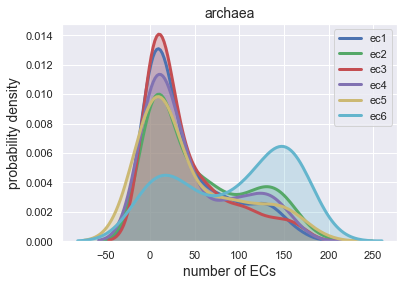

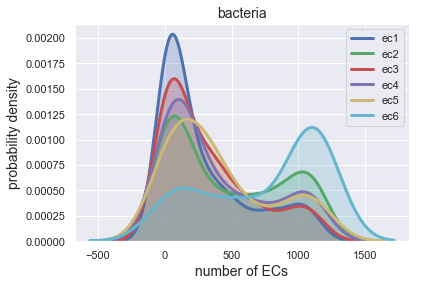

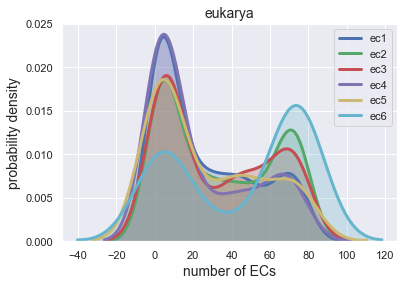

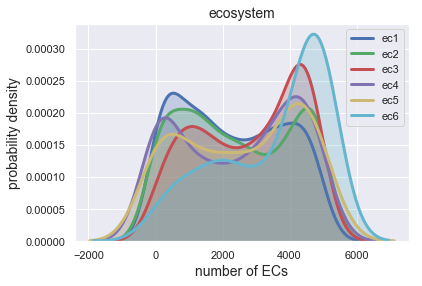

In [202]:
sns.distplot(arch_ec1_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec1')
sns.distplot(arch_ec2_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec2')
sns.distplot(arch_ec3_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec3')
sns.distplot(arch_ec4_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec4')
sns.distplot(arch_ec5_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec5')
sns.distplot(arch_ec6_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec6')
plt.xlabel('number of ECs', fontsize=14)
plt.ylabel('probability density', fontsize=14)
plt.title('archaea', fontsize=14)
plt.savefig('arch_ec_kde')
plt.show()

sns.distplot(bact_ec1_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec1')
sns.distplot(bact_ec2_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec2')
sns.distplot(bact_ec3_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec3')
sns.distplot(bact_ec4_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec4')
sns.distplot(bact_ec5_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec5')
sns.distplot(bact_ec6_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec6')
plt.xlabel('number of ECs', fontsize=14)
plt.ylabel('probability density', fontsize=14)
plt.title('bacteria', fontsize=14)
plt.savefig('bact_ec_kde')
plt.show()

sns.distplot(euk_ec1_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec1')
sns.distplot(euk_ec2_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec2')
sns.distplot(euk_ec3_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec3')
sns.distplot(euk_ec4_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec4')
sns.distplot(euk_ec5_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec5')
sns.distplot(euk_ec6_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec6')
plt.xlabel('number of ECs', fontsize=14)
plt.ylabel('probability density', fontsize=14)
plt.title('eukarya', fontsize=14)
plt.savefig('euk_ec_kde')
plt.show()

sns.distplot(eco_ec1_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec1')
sns.distplot(eco_ec2_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec2')
sns.distplot(eco_ec3_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec3')
sns.distplot(eco_ec4_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec4')
sns.distplot(eco_ec5_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec5')
sns.distplot(eco_ec6_counts, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='ec6')
plt.xlabel('number of ECs', fontsize=14)
plt.ylabel('probability density', fontsize=14)
plt.title('ecosystem', fontsize=14)
plt.savefig('eco_ec_kde')
plt.show()


In [ ]:
plt.hist(arch_ec1_dict.values(), bins=50, alpha=0.5, label='ec1')
plt.hist(arch_ec2_dict.values(), bins=50, alpha=0.5, label='ec2')
plt.hist(arch_ec3_dict.values(), bins=50, alpha=0.5, label='ec3')
plt.hist(arch_ec4_dict.values(), bins=50, alpha=0.5, label='ec4')
plt.hist(arch_ec5_dict.values(), bins=50, alpha=0.5, label='ec5')
plt.hist(arch_ec6_dict.values(), bins=50, alpha=0.5, label='ec6')
plt.title('archaea')
plt.legend(loc='best')
plt.xlabel('instances of an ec across domain')
plt.ylabel('number of occurrences of given ec coverage')
plt.show()

plt.hist(bact_ec1_dict.values(), bins=50, alpha=0.5, label='ec1')
plt.hist(bact_ec2_dict.values(), bins=50, alpha=0.5, label='ec2')
plt.hist(bact_ec3_dict.values(), bins=50, alpha=0.5, label='ec3')
plt.hist(bact_ec4_dict.values(), bins=50, alpha=0.5, label='ec4')
plt.hist(bact_ec5_dict.values(), bins=50, alpha=0.5, label='ec5')
plt.hist(bact_ec6_dict.values(), bins=50, alpha=0.5, label='ec6')
plt.title('bacteria')
plt.legend(loc='best')
plt.xlabel('instances of an ec across domain')
plt.ylabel('number of occurrences of given ec coverage')
plt.show()

plt.hist(euk_ec1_dict.values(), bins=50, alpha=0.5, label='ec1')
plt.hist(euk_ec2_dict.values(), bins=50, alpha=0.5, label='ec2')
plt.hist(euk_ec3_dict.values(), bins=50, alpha=0.5, label='ec3')
plt.hist(euk_ec4_dict.values(), bins=50, alpha=0.5, label='ec4')
plt.hist(euk_ec5_dict.values(), bins=50, alpha=0.5, label='ec5')
plt.hist(euk_ec6_dict.values(), bins=50, alpha=0.5, label='ec6')
plt.title('eukarya')
plt.legend(loc='best')
plt.xlabel('instances of an ec across domain')
plt.ylabel('number of occurrences of given ec coverage')
plt.show()

plt.hist(eco_ec1_dict.values(), bins=50, alpha=0.5, label='ec1')
plt.hist(eco_ec2_dict.values(), bins=50, alpha=0.5, label='ec2')
plt.hist(eco_ec3_dict.values(), bins=50, alpha=0.5, label='ec3')
plt.hist(eco_ec4_dict.values(), bins=50, alpha=0.5, label='ec4')
plt.hist(eco_ec5_dict.values(), bins=50, alpha=0.5, label='ec5')
plt.hist(eco_ec6_dict.values(), bins=50, alpha=0.5, label='ec6')
plt.title('ecosystem')
plt.legend(loc='best')
plt.xlabel('instances of an ec across domain')
plt.ylabel('number of occurrences of given ec coverage')
plt.show()

In [ ]:
plt.hist(arch_ec1_fracs, bins=50, weights=arch_ec1_weights, color='purple', alpha=0.5, label='arch')
plt.hist(bact_ec1_fracs, bins=50, weights=bact_ec1_weights, color='darkcyan', alpha=0.5, label='bact')
plt.hist(euk_ec1_fracs, bins=50, weights=euk_ec1_weights, color='goldenrod', alpha=0.5, label='euk')
plt.hist(eco_ec1_fracs, bins=50, weights=eco_ec1_weights, color='black', alpha=0.5, label='eco')
plt.legend(loc='best')
plt.xlabel('fraction coverage of ec across domain')
plt.ylabel('probability of given fractional coverage')
plt.savefig('ec1_coverage_compare')
plt.title('ec1')
plt.show()

plt.hist(arch_ec2_fracs, bins=50, weights=arch_ec2_weights, color='purple', alpha=0.5, label='arch')
plt.hist(bact_ec2_fracs, bins=50, weights=bact_ec2_weights, alpha=0.5, color='darkcyan', label='bact')
plt.hist(euk_ec2_fracs, bins=50, weights=euk_ec2_weights, alpha=0.5, color='goldenrod', label='euk')
plt.hist(eco_ec2_fracs, bins=50, weights=eco_ec2_weights, alpha=0.5, color='black', label='eco')
plt.legend(loc='best')
plt.xlabel('fraction coverage of ec across domain')
plt.ylabel('probability of given fractional coverage')
plt.savefig('ec1_coverage_compare')
plt.title('ec2')
plt.show()

plt.hist(arch_ec3_fracs, bins=50, weights=arch_ec3_weights, color='purple', alpha=0.5, label='arch')
plt.hist(bact_ec3_fracs, bins=50, weights=bact_ec3_weights, alpha=0.5, color='darkcyan', label='bact')
plt.hist(euk_ec3_fracs, bins=50, weights=euk_ec3_weights, alpha=0.5, color='goldenrod', label='euk')
plt.hist(eco_ec3_fracs, bins=50, weights=eco_ec3_weights, alpha=0.5, color='black', label='eco')
plt.legend(loc='best')
plt.xlabel('fraction coverage of ec across domain')
plt.ylabel('probability of given fractional coverage')
plt.savefig('ec1_coverage_compare')
plt.title('ec3')
plt.show()

plt.hist(arch_ec4_fracs, bins=50, weights=arch_ec4_weights, color='purple', alpha=0.5, label='arch')
plt.hist(bact_ec4_fracs, bins=50, weights=bact_ec4_weights, alpha=0.5, color='darkcyan', label='bact')
plt.hist(euk_ec4_fracs, bins=50, weights=euk_ec4_weights, alpha=0.5, color='goldenrod', label='euk')
plt.hist(eco_ec4_fracs, bins=50, weights=eco_ec4_weights, alpha=0.5, color='black', label='eco')
plt.legend(loc='best')
plt.xlabel('fraction coverage of ec across domain')
plt.ylabel('probability of given fractional coverage')
plt.savefig('ec1_coverage_compare')
plt.title('ec4')
plt.show()

plt.hist(arch_ec5_fracs, bins=50, weights=arch_ec5_weights, color='purple', alpha=0.5, label='arch')
plt.hist(bact_ec5_fracs, bins=50, weights=bact_ec5_weights, alpha=0.5, color='darkcyan', label='bact')
plt.hist(euk_ec5_fracs, bins=50, weights=euk_ec5_weights, alpha=0.5, color='goldenrod', label='euk')
plt.hist(eco_ec5_fracs, bins=50, weights=eco_ec5_weights, alpha=0.5, color='black', label='eco')
plt.legend(loc='best')
plt.xlabel('fraction coverage of ec across domain')
plt.ylabel('probability of given fractional coverage')
plt.savefig('ec1_coverage_compare')
plt.title('ec5')
plt.show()

plt.hist(arch_ec6_fracs, bins=50, weights=arch_ec6_weights, color='purple', alpha=0.5, label='arch')
plt.hist(bact_ec6_fracs, bins=50, weights=bact_ec6_weights, alpha=0.5, color='darkcyan', label='bact')
plt.hist(euk_ec6_fracs, bins=50, weights=euk_ec6_weights, alpha=0.5, color='goldenrod', label='euk')
plt.hist(eco_ec6_fracs, bins=50, weights=eco_ec6_weights, alpha=0.5, color='black', label='eco')
plt.legend(loc='best')
plt.xlabel('fraction coverage of ec across domain')
plt.ylabel('probability of given fractional coverage')
plt.savefig('ec1_coverage_compare')
plt.title('ec6')
plt.show()

In [ ]:
sns.distplot(arch_ec1_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='arch')
sns.distplot(bact_ec1_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='bact')
sns.distplot(eco_ec1_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='euk')
sns.distplot(euk_ec1_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='eco')
plt.title('ec1 fracs kde')
plt.xlabel('fractional ec occurrence across domain')
plt.ylabel('probability density')
plt.savefig('ec1_fracs_kde')
plt.show()

sns.distplot(arch_ec2_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='arch')
sns.distplot(bact_ec2_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='bact')
sns.distplot(eco_ec2_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='euk')
sns.distplot(euk_ec2_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='eco')
plt.title('ec2 fracs kde')
plt.xlabel('fractional ec occurrence across domain')
plt.ylabel('probability density')
plt.savefig('ec2_fracs_kde')
plt.show()

sns.distplot(arch_ec3_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='arch')
sns.distplot(bact_ec3_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='bact')
sns.distplot(eco_ec3_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='euk')
sns.distplot(euk_ec3_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='eco')
plt.title('ec3 fracs kde')
plt.xlabel('fractional ec occurrence across domain')
plt.ylabel('probability density')
plt.savefig('ec3_fracs_kde')
plt.show()

sns.distplot(arch_ec4_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='arch')
sns.distplot(bact_ec4_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='bact')
sns.distplot(eco_ec4_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='euk')
sns.distplot(euk_ec4_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='eco')
plt.title('ec4 fracs kde')
plt.xlabel('fractional ec occurrence across domain')
plt.ylabel('probability density')
plt.savefig('ec4_fracs_kde')
plt.show()

sns.distplot(arch_ec5_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='arch')
sns.distplot(bact_ec5_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='bact')
sns.distplot(eco_ec5_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='euk')
sns.distplot(euk_ec5_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='eco')
plt.title('ec5 fracs kde')
plt.xlabel('fractional ec occurrence across domain')
plt.ylabel('probability density')
plt.savefig('ec5_fracs_kde')
plt.show()

sns.distplot(arch_ec6_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='arch')
sns.distplot(bact_ec6_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='bact')
sns.distplot(eco_ec6_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='euk')
sns.distplot(euk_ec6_fracs, hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3}, label='eco')
plt.title('ec6 fracs kde')
plt.xlabel('fractional ec occurrence across domain')
plt.ylabel('probability density')
plt.savefig('ec6_fracs_kde')
plt.show()


In [ ]:
ec1_fracdict = ec_fracs(ec1s)
ec2_fracdict = ec_fracs(ec2s)
ec3_fracdict = ec_fracs(ec3s)
ec4_fracdict = ec_fracs(ec4s)
ec5_fracdict = ec_fracs(ec5s)
ec6_fracdict = ec_fracs(ec6s)

In [ ]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sinplot()